In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats.stats import pearsonr
import networkx as nx
import community
from matplotlib import pyplot as plt
from bctpy.bct.utils.other import threshold_proportional
import slir

In [2]:
def pearson_corr_with_pval(C):
    corr = np.zeros((len(C), len(C)))
    pval = np.zeros((len(C), len(C)))

    for i in range(len(C)):
        for j in range(len(C)):
            corr[i][j], pval[i][j] = pearsonr(C[i], C[j])
    return corr, pval

In [3]:
C = np.load('../Glasser180ts_sum_npy/sub-03.npy')
# C = np.load('../AAL116ts_run1_npy/sub-01.npy')

In [4]:
corr, pval = pearson_corr_with_pval(C)

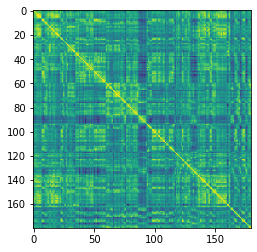

In [5]:
plt.imshow(corr)

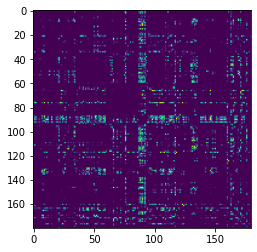

In [6]:
plt.imshow(pval)

In [7]:
results_df = pd.read_csv('../all_results_JASP_output21.csv')
results_df = results_df[:57]

In [8]:
results_df.tail()

,Participant ID,Control/Patient,Completed full study,Gender,DOB,age,CRP,ESR,RheumatoidFactor,DAS score translated,...,preSMA_PPE,preSMA_RPE-PPE,preSMApeak_RPE,preSMApeak_PPE,preSMApk_RPE-PPE,LRr*R,LRp*P,age_demeaned,P_demean,R_demean
52,P75,Control,y,Female,21/12/1957,61.0,0.0,12.0,0.0,2.02 (remission),...,0.7886,-0.1553,1.2750,1.3200,-0.0450,4.695488,2.912513,8.32,-2.322121,-2.448194
53,P76,Control,y,Female,23/02/1972,46.0,0.0,5.0,0.0,1.13 (remission),...,0.6475,-1.0993,0.3530,0.8633,-0.5103,7.734734,4.707469,-6.68,0.608655,2.483694
54,P78,Control,y,Male,20/07/1979,39.0,0.0,4.0,0.0,NaN,...,0.7121,-0.6074,0.1083,1.1270,-1.0187,1.921451,2.832947,-13.68,-4.235522,-8.746788
55,P79,Control,y,Female,20/09/1970,48.0,0.0,7.0,0.0,NaN,...,1.2560,-1.7586,-0.5731,1.3140,-1.8871,4.297163,0.415976,-4.68,-7.110546,-3.363680
56,P80,Control,y,Female,13/05/1961,57.0,5.0,22.0,0.0,NaN,...,1.2500,-0.0300,1.7480,1.4200,0.3280,5.184762,2.385175,4.32,-1.330016,2.383224


In [9]:
num_ROIs = 180
adj_mat = corr
for j in range(num_ROIs):
    for j in range(num_ROIs):
        adj_mat[j][j] = 0

thresholded_adj_mat_pval_based = np.zeros_like(adj_mat)
binarized_adj_mat_pval_based = np.zeros_like(adj_mat)
thresholded_absolute_adj_mat_top10percent = threshold_proportional(np.abs(adj_mat), 0.1)
binarized_adj_mat_top10percent = thresholded_absolute_adj_mat_top10percent>0

for j in range(num_ROIs):
    for k in range(num_ROIs):
        if pval[j][k]:
            thresholded_adj_mat_pval_based[j][k] = corr[j][k]
            binarized_adj_mat_pval_based[j][k] = 1

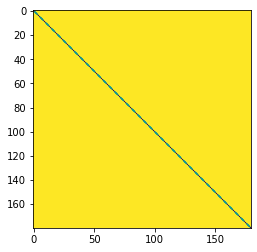

In [10]:
plt.imshow(binarized_adj_mat_pval_based)

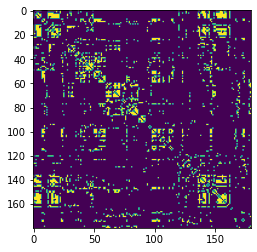

In [11]:
plt.imshow(binarized_adj_mat_top10percent)

In [12]:
C.shape

(180, 260)

# Concat and Sum

In [13]:
# ts_dir_run1 = '../Glasser180ts_run1_npy/'
# ts_dir_run2 = '../Glasser180ts_run2_npy/'
# ts_dir_run3 = '../Glasser180ts_run3_npy/'
# ts_dir_run4 = '../Glasser180ts_run4_npy/'
# lst = os.listdir(ts_dir_run1)
# lst.sort()
# for npyfile in lst:
#     print(npyfile)
#     C1 = np.load(os.path.join(ts_dir_run1,npyfile))
#     C2 = np.load(os.path.join(ts_dir_run2,npyfile))
#     C3 = np.load(os.path.join(ts_dir_run3,npyfile))
#     C4 = np.load(os.path.join(ts_dir_run4,npyfile))
#     concatC = np.concatenate((C1,C2,C3,C4), axis=1)
#     sumC = C1+C2+C3+C4
#     output_directory = '../Glasser180ts_concat_npy/'
#     output_file = os.path.join(output_directory, npyfile)
#     with open(output_file, 'wb') as f:
#         np.save(f, concatC)
#     output_directory = '../Glasser180ts_sum_npy/'
#     output_file = os.path.join(output_directory, npyfile)
#     with open(output_file, 'wb') as f:
#         np.save(f, sumC)

# Nodal metrics

In [360]:
run = 'sum' #'rest'
if run=='run-1':
    ts_dir = '../Glasser180ts_run1_npy/'
elif run=='run-2':
    ts_dir = '../Glasser180ts_run2_npy/'
elif run=='run-3':
    ts_dir = '../Glasser180ts_run3_npy/'
elif run=='run-4':
    ts_dir = '../Glasser180ts_run4_npy/'
elif run=='concat':
    ts_dir = '../Glasser180ts_concat_npy/'
elif run=='sum':
    ts_dir = '../Glasser180ts_sum_npy/'
elif run=='rest':
    ts_dir = '../Glasser180ts_rest_npy/'

In [361]:
# num_participants = 57
# num_ROIs = 180

# # degree, eigen-vector, betweenness, closeness, load
# num_metrics = 5
# network_metrics = np.zeros((num_participants, num_ROIs, num_metrics))
# print(network_metrics.shape)

# lst = os.listdir(ts_dir)
# lst.sort()
# subj=0
# for npyfile in lst:
#     print(npyfile)
#     C = np.load(os.path.join(ts_dir,npyfile))
#     corr, pval = pearson_corr_with_pval(C)
    
#     adj_mat = corr
#     for j in range(num_ROIs):
#         for j in range(num_ROIs):
#             adj_mat[j][j] = 0
    
#     thresholded_absolute_adj_mat_top10percent = threshold_proportional(np.abs(adj_mat), 0.1)
#     binarized_adj_mat_top10percent = thresholded_absolute_adj_mat_top10percent>0
                
#     graph = nx.from_numpy_matrix(binarized_adj_mat_top10percent)

#     for node_index in range(num_ROIs):
#         network_metrics[subj,node_index, :] = np.array([nx.degree_centrality(graph)[node_index], 
#                                                nx.eigenvector_centrality(graph)[node_index], 
#                                                nx.betweenness_centrality(graph)[node_index],
#                                                nx.closeness_centrality(graph)[node_index],
#                                                nx.load_centrality(graph)[node_index]])

#     subj+=1

# with open('network_metrics_'+run+'.npy', 'wb') as f:
#     np.save(f, network_metrics)

In [362]:
network_metrics_loaded = np.load('network_metrics_'+run+'.npy')
network_metrics_loaded.shape

(57, 180, 5)

# All outcome variables

In [363]:
patients_df = results_df[:29]
patients_network_metrics = network_metrics_loaded[:29]

In [364]:
patients_P_demean = np.array(patients_df['P_demean'])
patients_avg_fatigue = np.array(patients_df['Diary avg fatigue'])
patients_facit = np.array(patients_df['Facit'])
patients_esr = np.array(patients_df['ESR'])
patients_il6 = np.array(patients_df['IL-6'])
patients_infy = np.array(patients_df['IFNγ'])
patients_il10 = np.array(patients_df['IL-10'])
patients_il12 = np.array(patients_df['IL-12p70'])
patients_il13 = np.array(patients_df['IL-13'])
patients_il1b = np.array(patients_df['IL-1β'])
patients_il2 = np.array(patients_df['IL-2'])
patients_il4 = np.array(patients_df['IL-4'])
patients_il8 = np.array(patients_df['IL-8'])
patients_tnfa = np.array(patients_df['TNFα'])


patients_bdi = np.array(patients_df['BDI score '].fillna(0)) # no corr
patients_mcgill = np.array(patients_df['McGIll']) # no corr

patients_das = np.array(patients_df['DAS score'].fillna(0))
patients_avg_pain = np.array(patients_df['Diary avg pain'])
patients_bpi_sev = np.array(patients_df['BPI severity'])
patients_bpi_int = np.array(patients_df['BPI interference'])

In [382]:
outcome_var = patients_tnfa

In [383]:
cols = ['ROI', 'correlation','p-value','correlation','p-value','correlation','p-value','correlation','p-value','correlation','p-value']
corr_df = pd.DataFrame(columns=cols)
# degree(0), eigen-vector(1), betweenness(2), closeness(3), load(4)
metrics = ['degree', 'eigen-vector', 'betweenness', 'closeness', 'load']
num_metrics = 5

significant = []

for ROI in [101, 105, 107, 108, 110, 111, 113, 166, 167, 168]: #one subtracted from actual ROIs
    row = [ROI+1]
    for metric in range(num_metrics):
#         print(metric)
        corr, pval = pearsonr(patients_network_metrics[:, ROI,metric], outcome_var)
        row.append(corr)
        row.append(pval)
        if pval<(0.005): #multiple-comparisons
            significant.append([ROI+1, metrics[metric]])
    corr_df = corr_df.append(pd.Series(row, index=cols), ignore_index=True)

corr_df.to_csv('corr_df.csv')

/var/folders/s6/b6fvq5p94z3_b9bh98gfbwqm0000gn/T/ipykernel_89605/92261883.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.Series(row, index=cols), ignore_index=True)
/var/folders/s6/b6fvq5p94z3_b9bh98gfbwqm0000gn/T/ipykernel_89605/92261883.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.Series(row, index=cols), ignore_index=True)
/var/folders/s6/b6fvq5p94z3_b9bh98gfbwqm0000gn/T/ipykernel_89605/92261883.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_df = corr_df.append(pd.Series(row, index=cols), ignore_index=True)
/var/folders/s6/b6fvq5p94z3_b9bh98gfbwqm0000gn/T/ipykernel_89605/92261883.py:18: FutureWarning: The frame.append method is deprecated an

In [384]:
significant

[[114, 'betweenness'], [114, 'load']]

In [385]:
run

'sum'

In [369]:
corr, pval = pearsonr(patients_avg_fatigue, patients_avg_pain)
print(corr, pval)

0.7311230716977675 6.643717513659517e-06


# rest of this notebook is not required

## fatigue

In [46]:
patients_df = results_df[:29]

In [47]:
patients_network_metrics = network_metrics_loaded[:29]

In [48]:
patients_avg_fatigue = np.array(patients_df['Diary avg fatigue'])
patients_facit = np.array(patients_df['Facit'])

In [49]:
# degree, eigen-vector, betweenness, closeness, load
num_metrics = 5

for metric in range(num_metrics):
    print(metric)
    for ROI in [101, 105, 107, 108, 110, 111, 113, 166, 167, 168]: #one subtracted from actual ROIs
        corr, pval = pearsonr(patients_network_metrics[:, ROI,metric], patients_avg_fatigue)
        print(ROI+1, corr, pval)

0
102 0.060541964173183874 0.7550605667333755
106 0.38920606724746265 0.036903217049843576
108 0.1850113517107868 0.33664236457448393
109 0.2212736011761681 0.24868515374297695
110 -0.05071017553565808 0.7939086527190605
111 -0.028275908407912366 0.8842361475767719
112 -0.12368864918551992 0.5226625446642158
114 -0.11569962146578172 0.5500617853470275
167 0.5491974941469334 0.002032164614344265
168 0.13289147402557738 0.4919434570660801
169 -0.10760379289994575 0.5784894873336343
1
102 -0.019886947247419347 0.9184442735509053
106 0.36196270438898004 0.053670333219472954
108 0.13844487152045637 0.47385915328004746
109 0.15905272251892 0.409874591473789
110 -0.18330562140098422 0.34119441559863545
111 -0.07870974105993711 0.6848521390374782
112 -0.23134639726523756 0.22723877311208074
114 -0.16157867102630288 0.4023812164093522
167 0.46630021007611894 0.010781923975041428
168 0.0430102222150235 0.8246788555350908
169 -0.0018385733845300751 0.9924477480812078
2
102 0.28272046599543893 0.1

In [51]:
# degree, eigen-vector, betweenness, closeness, load
num_metrics = 5

for metric in range(num_metrics):
    print(metric)
    for ROI in [101, 105, 107, 108, 110, 111, 113, 166, 167, 168]: #one subtracted from actual ROIs
        corr, pval = pearsonr(patients_network_metrics[:, ROI,metric], patients_facit)
        print(ROI+1, corr, pval)

0
102 0.09958145619384552 0.607283888191051
106 -0.20593361783574818 0.2838344983122977
108 -0.0517129041554351 0.7899227332610034
109 -0.2086955155517106 0.2772832237361434
110 0.25035696565948296 0.19023463711810173
111 0.05824829839018451 0.7640751259648579
112 0.029337596460837282 0.8799200495589439
114 0.36784493775212834 0.0496202964214285
167 -0.230376714779394 0.2292474167071973
168 0.10320960494404267 0.5941866214398239
169 0.1691401999005557 0.3804180908495891
1
102 0.05726078973768218 0.7679656133365251
106 -0.22072756798257423 0.24988460673421273
108 -0.012594217211806969 0.9483005604001905
109 -0.1870392508324838 0.33127874003636626
110 0.39092281506583154 0.03600723537535394
111 -0.078778550865707 0.6845906305116303
112 -0.04182904497586909 0.829422791021338
114 0.2788674228550948 0.14293944733944672
167 -0.24276149058953764 0.20448072399467754
168 0.05022708603174313 0.795830789012985
169 0.08433274623503376 0.6636020847035862
2
102 0.11139929119812174 0.5650810185170164

## immunological markers

In [34]:
patients_esr = np.array(patients_df['ESR'])
patients_il6 = np.array(patients_df['IL-6'])

In [35]:
# degree, eigen-vector, betweenness, closeness, load
num_metrics = 5

for metric in range(num_metrics):
    print(metric)
    for ROI in range(num_ROIs):
        corr, pval = pearsonr(patients_network_metrics[:, ROI,metric], patients_esr)
        if pval<0.01:
            print(corr, pval, ROI+1)

0
1
2
0.6132287154350297 0.00040454317162871335 47
0.6456924977511768 0.00015508193566494936 101
0.4931219961701001 0.006566565671441989 146
3
4
0.5903525162806115 0.000748424799642351 47
0.637049587343086 0.00020231844861267045 101
0.4737903039468624 0.009423962757267553 146


In [36]:
# degree, eigen-vector, betweenness, closeness, load
num_metrics = 5

for metric in range(num_metrics):
    print(metric)
    for ROI in range(num_ROIs):
        corr, pval = pearsonr(patients_network_metrics[:, ROI,metric], patients_il6)
        if pval<0.01:
            print(corr, pval, ROI+1)

0
0.5079980460025203 0.00490242344620685 67
1
0.6288356003544014 0.0002585782812596407 67
2
0.4931636567456589 0.006561309569764952 58
0.5639758981820817 0.0014408243339869785 60
0.48327177582497277 0.007913808851141207 125
3
4
0.5493510759063295 0.002025077825364474 60
0.4749921557849895 0.0092200712614059 125


In [1]:
patients_immun = np.array(patients_df['TNFα'])
# degree, eigen-vector, betweenness, closeness, load
num_metrics = 5

for metric in range(num_metrics):
    print(metric)
    for ROI in range(num_ROIs):
        corr, pval = pearsonr(patients_network_metrics[:, ROI,metric], patients_immun)
        if pval<0.01:
            print(corr, pval, ROI+1)

NameError: name 'np' is not defined

# Global metrics

In [35]:
num_participants = 57
num_ROIs = 180

# modularity, small-world sigma, small-world omega, 
num_metrics = 3
global_network_metrics = np.zeros((num_participants, num_metrics))
print(network_metrics.shape)

lst = os.listdir('../Glasser180ts_run1_npy/')
lst.sort()
subj=0
for npyfile in lst:
    print(npyfile)
    C = np.load(os.path.join('../Glasser180ts_run1_npy/',npyfile))
    corr, pval = pearson_corr_with_pval(C)
    
    adj_mat = corr
    for j in range(num_ROIs):
        for j in range(num_ROIs):
            adj_mat[j][j] = 0
    
    thresholded_absolute_adj_mat_top10percent = threshold_proportional(np.abs(adj_mat), 0.1)
    binarized_adj_mat_top10percent = thresholded_absolute_adj_mat_top10percent>0
                
    graph = nx.from_numpy_matrix(binarized_adj_mat_top10percent)

    # Find modularity
    part = community.best_partition(graph)
    mod = community.modularity(part,graph)
#     global_network_metrics[subj, :] = np.array([mod, nx.sigma(graph), nx.omega(graph)])
    global_network_metrics[subj, :] = np.array([mod])


    subj+=1

with open('global_network_metrics.npy', 'wb') as f:
    np.save(f, global_network_metrics)

(57, 180, 5)
sub-01.npy
sub-02.npy
sub-03.npy
sub-05.npy
sub-07.npy
sub-08.npy
sub-10.npy
sub-12.npy
sub-13.npy
sub-14.npy
sub-15.npy
sub-16.npy
sub-17.npy
sub-18.npy
sub-19.npy
sub-20.npy
sub-23.npy
sub-24.npy
sub-27.npy
sub-28.npy
sub-29.npy
sub-32.npy
sub-33.npy
sub-34.npy
sub-35.npy
sub-37.npy
sub-38.npy
sub-40.npy
sub-42.npy
sub-43.npy
sub-44.npy
sub-46.npy
sub-47.npy
sub-49.npy
sub-50.npy
sub-54.npy
sub-55.npy
sub-56.npy
sub-57.npy
sub-58.npy
sub-59.npy
sub-60.npy
sub-61.npy
sub-64.npy
sub-65.npy
sub-66.npy
sub-68.npy
sub-69.npy
sub-71.npy
sub-72.npy
sub-73.npy
sub-74.npy
sub-75.npy
sub-76.npy
sub-78.npy
sub-79.npy
sub-80.npy


In [41]:
xi_lapse = np.array(results_df['xi'])

In [43]:
corr, pval = pearsonr(global_network_metrics[:, 0], xi_lapse)
corr, pval

(-0.02899646224535794, 0.8304586210640141)

# Multilinear regression

In [48]:
def upper_tri_masking(A):
    m = A.shape[0]
    r = np.arange(m)
    mask = r[:,None] < r
    return A[mask]

In [53]:
num_participants = 57
num_ROIs = 180


X = np.zeros((num_participants, 16110))
Y = P_demean

lst = os.listdir('../Glasser180ts_run1_npy/')
lst.sort()
subj=0
for npyfile in lst:
    print(npyfile)
    C = np.load(os.path.join('../Glasser180ts_run1_npy/',npyfile))
    corr, pval = pearson_corr_with_pval(C)
    
    adj_mat = corr
    for j in range(num_ROIs):
        for j in range(num_ROIs):
            adj_mat[j][j] = 0
    
    thresholded_absolute_adj_mat_top10percent = threshold_proportional(np.abs(adj_mat), 0.1)
    binarized_adj_mat_top10percent = thresholded_absolute_adj_mat_top10percent>0
    X[subj] = upper_tri_masking(adj_mat)    

    subj+=1

sub-01.npy
sub-02.npy
sub-03.npy
sub-05.npy
sub-07.npy
sub-08.npy
sub-10.npy
sub-12.npy
sub-13.npy
sub-14.npy
sub-15.npy
sub-16.npy
sub-17.npy
sub-18.npy
sub-19.npy
sub-20.npy
sub-23.npy
sub-24.npy
sub-27.npy
sub-28.npy
sub-29.npy
sub-32.npy
sub-33.npy
sub-34.npy
sub-35.npy
sub-37.npy
sub-38.npy
sub-40.npy
sub-42.npy
sub-43.npy
sub-44.npy
sub-46.npy
sub-47.npy
sub-49.npy
sub-50.npy
sub-54.npy
sub-55.npy
sub-56.npy
sub-57.npy
sub-58.npy
sub-59.npy
sub-60.npy
sub-61.npy
sub-64.npy
sub-65.npy
sub-66.npy
sub-68.npy
sub-69.npy
sub-71.npy
sub-72.npy
sub-73.npy
sub-74.npy
sub-75.npy
sub-76.npy
sub-78.npy
sub-79.npy
sub-80.npy


In [104]:
indices = np.arange(num_participants)
np.random.shuffle(indices)
X_shuffled = X[indices]
Y_shuffled = Y[indices]
model = slir.SparseLinearRegression(n_iter=200, verbose=True)

x_train = X_shuffled[:45]
y_train = Y_shuffled[:45]
x_test = X_shuffled[45:]
y_test = Y_shuffled[45:]

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

SLiR (Sparse Linear Regression)
InputDim:16110/OutputLabels:1/TrainNum:45
Iter:10, DimNum:10564, Error:0.000285
Iter:20, DimNum:2130, Error:0.000129
Iter:30, DimNum:382, Error:0.000077
Iter:40, DimNum:138, Error:0.000048
Iter:50, DimNum:74, Error:0.000040
*
Iter:60, DimNum:60, Error:0.000039
*
*
Iter:70, DimNum:48, Error:0.000005
Iter:80, DimNum:42, Error:0.000020
Iter:90, DimNum:41, Error:0.000013
Iter:100, DimNum:41, Error:0.000010
Iter:110, DimNum:41, Error:0.000008
Iter:120, DimNum:41, Error:0.000008
Iter:130, DimNum:41, Error:0.000007
Iter:140, DimNum:41, Error:0.000007
Iter:150, DimNum:41, Error:0.000007
Iter:160, DimNum:41, Error:0.000007
Iter:170, DimNum:41, Error:0.000006
Iter:180, DimNum:41, Error:0.000005
Iter:190, DimNum:41, Error:0.000004
Iter:200, DimNum:41, Error:0.000004


In [105]:
y_pred

array([-4.73595648, -3.24824683, -4.92867827,  0.5295537 , -2.68022195,
        2.17292784, -3.24290022, -2.43836374,  2.13014625, -3.51806692,
       -3.25818848,  2.49758329])

In [106]:
y_test

array([ 2.46608252, -6.2977876 , -0.3573006 ,  4.0166552 ,  5.73740175,
        0.60865463, -6.55232368,  4.86839052,  0.2291673 ,  4.21649654,
       -1.80388124,  6.73947668])

In [107]:
print("Correlation: %.4f" % np.corrcoef(y_pred, y_test)[0, 1])
print("MSE: %.4f" % np.mean((y_pred - y_test) ** 2))

Correlation: 0.3019
MSE: 26.2847


In [108]:
model.coef_[model.coef_>0]

array([1.26227659, 0.8227204 , 1.45826332, 1.48450463, 1.90377789,
       0.45099504, 1.44349439, 1.42971098, 6.1342129 , 0.23616095,
       1.53447003, 0.09167925, 0.62505626, 2.63564451, 3.37017969,
       4.79937553, 0.5726302 , 3.96991018, 1.77952641, 2.76962909,
       0.57410125])